In [1]:
import simplejson as json

with open('0001_bytearray_master.json') as f:
    byte_array_data_master = json.load(f)

with open('0002_binary_master.json') as f:
    bin_obj_data_master = json.load(f)

with open('0006_bytearray_0.3.4.json') as f:
    byte_array_data_old = json.load(f)

with open('0004_binary_0.3.4.json') as f:
    bin_obj_data_old = json.load(f)

In [2]:
from collections import defaultdict


def prepare_data(data, name_pattern=''):
    ret = {}

    for bench in data['benchmarks']:
        params = bench['param'].split('-')
        name = bench['name']
        
        if name_pattern not in name:
            continue
        
        if 'async' in name:
            continue

        if params[0] != 'simple':
            continue
        
        value_sz = int(params[1])
        median = bench['stats']['median'] * 1000000    
        ret[value_sz] = median
    return ret

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


def plot(old_data, new_data, title='',yscale='linear', time_scale=1, ylabel='us'):
    labels = []
    for k in new_data.keys():
        if k // (1024 * 1024) > 0 or k == 1024 * 1024:
            labels.append(f'{k / (1024 * 1024)}Mb')
        elif k // 1024 > 0:
            labels.append(f'{k / 1024}Kb')
        else:
            labels.append(k)

    
    new_means = [v / time_scale for v in new_data.values()]
    old_means = [v / time_scale for v in old_data.values()]
    
    old_means = old_means + [0] * (len(new_means) - len(old_means))

    x = np.arange(len(labels))
    width = 0.3

    fig, ax = plt.subplots()
    plt.rcParams["figure.figsize"] = (15, 12)
    plt.yscale(yscale)
    
    rects = []
   
    rects.append(ax.bar(x - width * 0.5, old_means, width, label='0.3.4'))
    rects.append(ax.bar(x + width * 0.5, new_means, width, label='0.4.0'))

    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    for rect in rects:
        ax.bar_label(rect, padding=3)


    fig.tight_layout()

    plt.show()

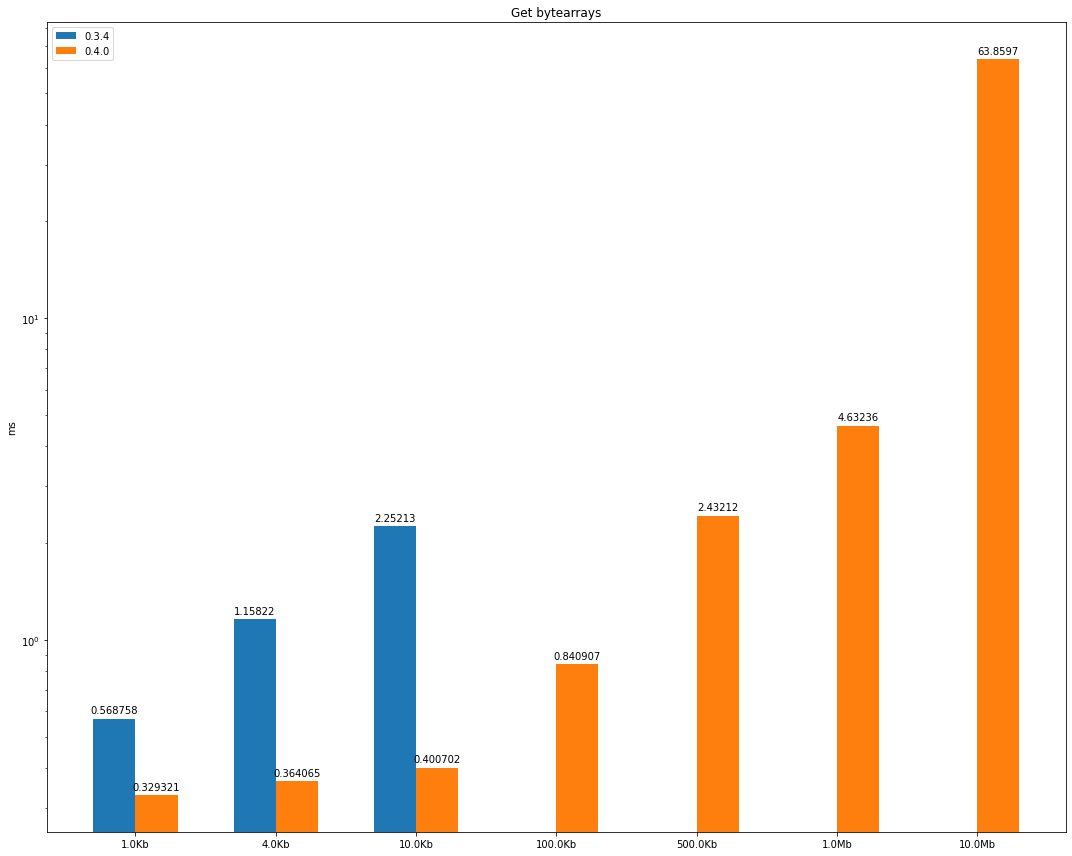

In [8]:
get_old = prepare_data(byte_array_data_old, 'get')
get_new = prepare_data(byte_array_data_master, 'get')

plot(get_old, get_new, 'Get bytearrays', yscale='log', ylabel='ms', time_scale=1000)

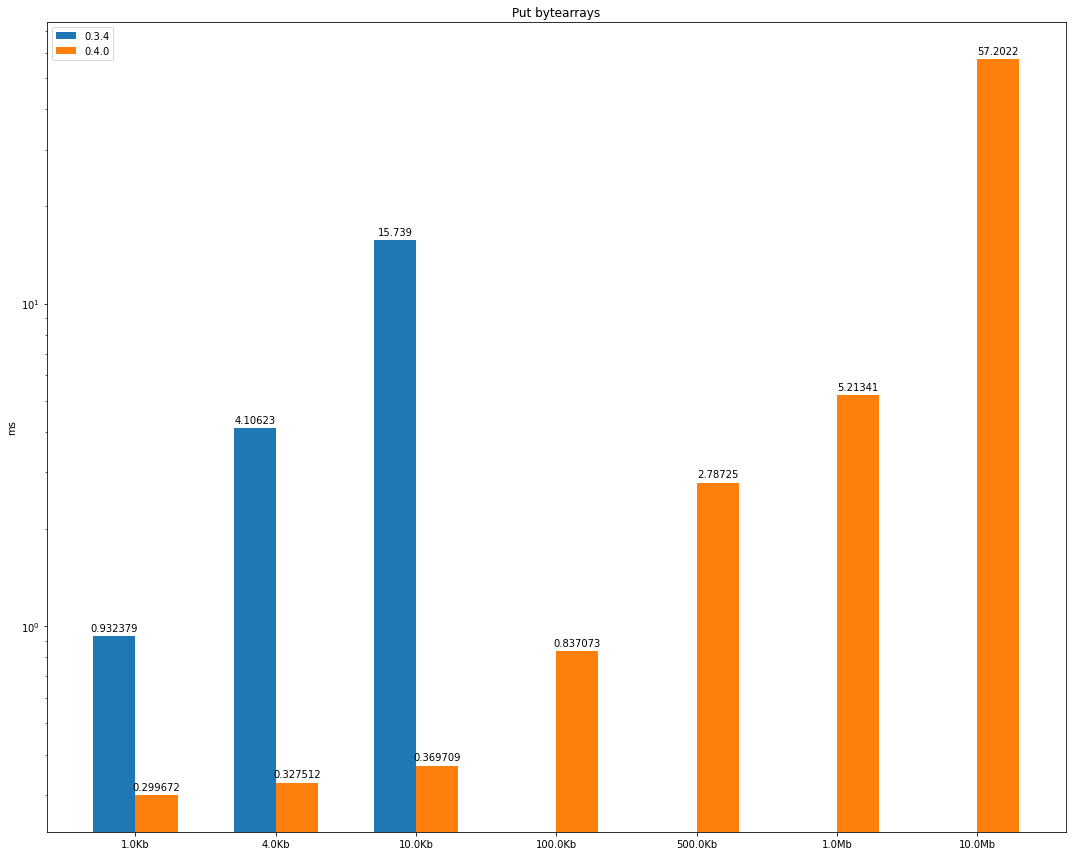

In [5]:
put_old = prepare_data(byte_array_data_old, 'put')
put_new = prepare_data(byte_array_data_master, 'put')

plot(put_old, put_new, 'Put bytearrays', ylabel='ms', yscale='log', time_scale=1000)

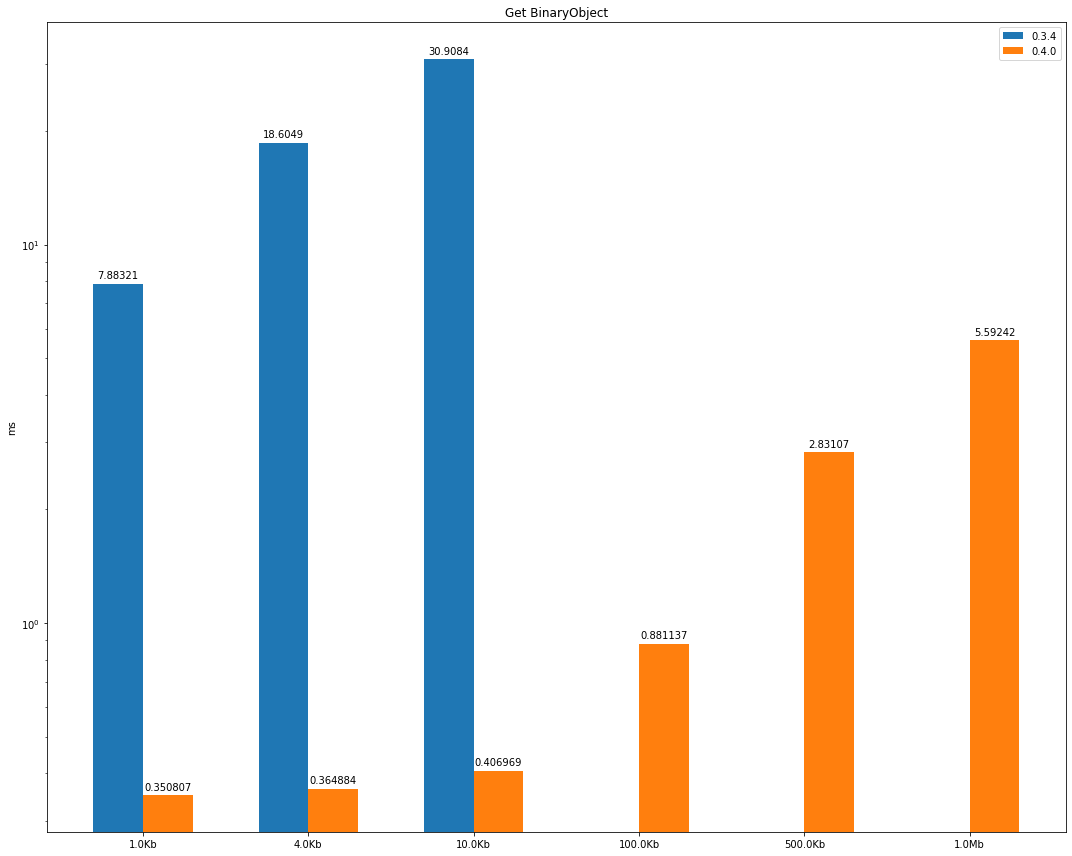

In [6]:
get_old = prepare_data(bin_obj_data_old, 'put')
get_new = prepare_data(bin_obj_data_master, 'put')


plot(get_old, get_new, 'Get BinaryObject', yscale='log', ylabel='ms', time_scale=1000)

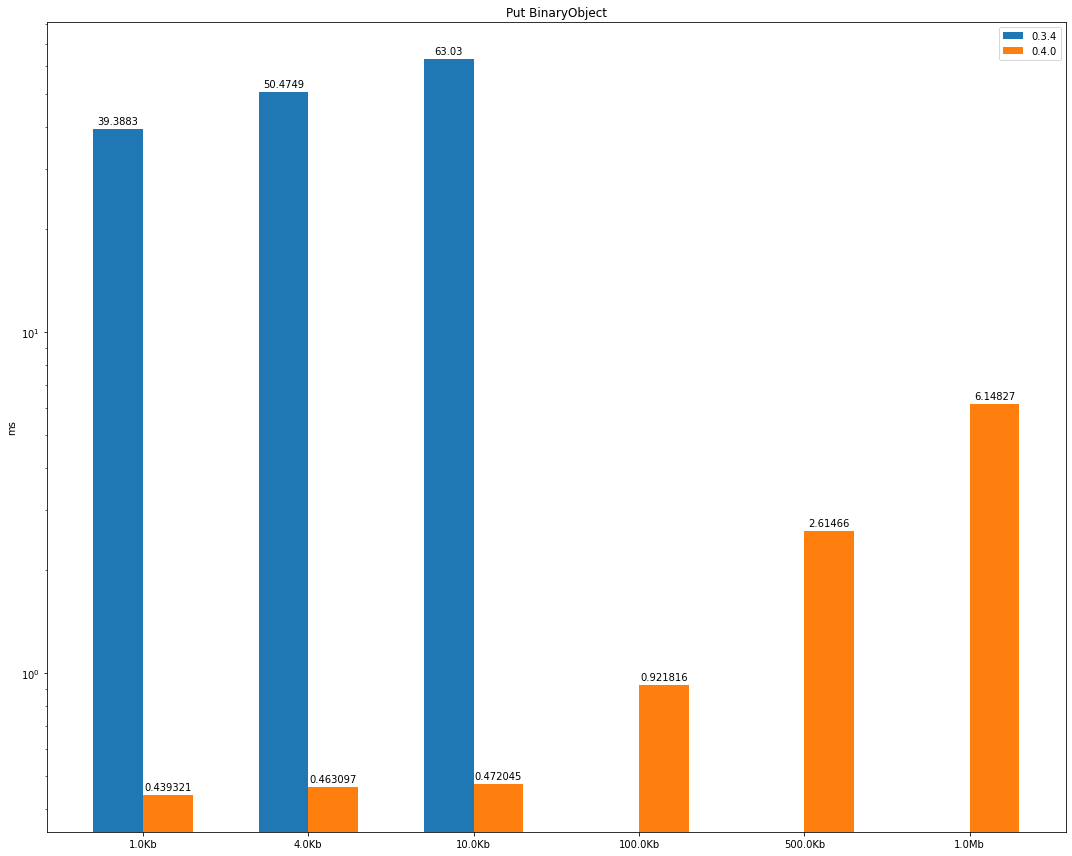

In [7]:
put_old = prepare_data(bin_obj_data_old, 'get')
put_new = prepare_data(bin_obj_data_master, 'get')


plot(put_old, put_new, 'Put BinaryObject', yscale='log', ylabel='ms', time_scale=1000)